In [2]:
# Import necessary dependencies & libraries
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Create engine to connect with our database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect an existing database into a new model
base = automap_base()

# Reflect the tables in our database
base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [4]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [6]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Find the most recent data in the database
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f'The most recent date is: {most_recent_date}')

# Find the date exactly 1 year previous to our most recent date
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f'The date a year from our most recent date is: {year_ago}')

The most recent date is: ('2017-08-23',)
The date a year from our most recent date is: 2016-08-23


In [72]:
#  Perform a query to retrieve the date and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp)\
              .filter(measurement.date >= year_ago)\
              .order_by(measurement.date).all()

# Create a Pandas DataFrame, set index to the date column, & sorted by date
precip_df = pd.DataFrame(precip_data)
precip_df = precip_df.set_index('date')
precip_df = precip_df.sort_values('date')
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


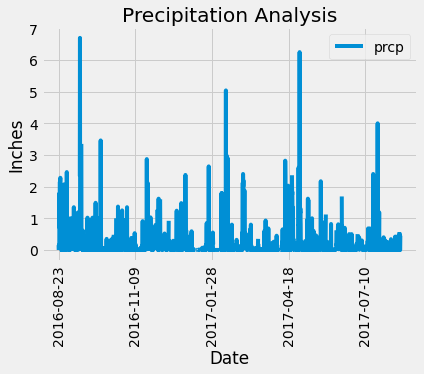

In [8]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=90);
plt.title('Precipitation Analysis');
plt.xlabel('Date');
plt.ylabel('Inches');
plt.show();

In [9]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [10]:
# How many stations are available in this dataset?
station_count = session.query(station).count()
print(f'There are a total of {station_count} stations')

There are a total of 9 stations


In [13]:
# List the stations & counts in descending order to find most active stations
most_active = session.query(measurement.station, func.count(measurement.station))\
            .group_by(measurement.station)\
            .order_by(func.count(measurement.station).desc())\
            .all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Calculate lowest, highest, & average temp of most active station
most_active_station = most_active[0][0]
mas_data = session.query(func.min(measurement.tobs),\
                         func.max(measurement.tobs),\
                         func.avg(measurement.tobs))\
                         .filter(measurement.station == most_active_station)\
                         .all()
min_temp = mas_data[0][0]
max_temp = mas_data[0][1]
avg_temp = round(mas_data[0][-1],2)

print(f'Station USC00519281 lowestest temp: {min_temp} degrees')
print(f'Station USC00519281 highest temp: {max_temp} degrees')
print(f'Station USC00519281 average temp: {avg_temp} degrees')

Station USC00519281 lowestest temp: 54.0 degrees
Station USC00519281 highest temp: 85.0 degrees
Station USC00519281 average temp: 71.66 degrees


In [51]:
# Query last 12 months of temperature observation data for above station
mas_last_twelve = session.query(measurement.station, measurement.tobs)\
                    .filter(measurement.station == most_active_station)\
                    .filter(measurement.date >= year_ago)\
                    .all()
mas_df = pd.DataFrame(mas_last_twelve)
mas_df = mas_df.set_index('station')
mas_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


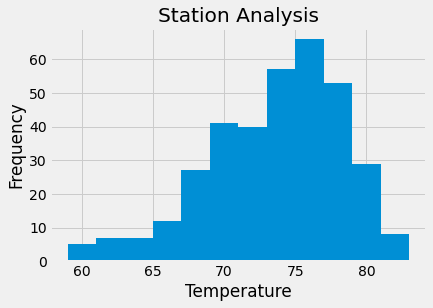

In [61]:
# Plot the results as a histogram

mas_df.hist(column='tobs',bins=12);
plt.title('Station Analysis');
plt.xlabel('Temperature');
plt.ylabel('Frequency');

## Bonus Challenge Assignment

In [78]:
# Function to find min, avg, and max temp for the imputted range of dates
def calc_temps(start_date, end_date):    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [79]:
# Using the calc_temps func, calc the tmin, tavg, and tmax of the previous year from above
trip = calc_temps('2011-02-28', '2012-02-28')
trip

[(56.0, 72.76152158010241, 86.0)]

In [88]:
# Plot the results from above as a bar chart. 
y = trip[0][1]
x = 0
plt.bar(x = x, y = y)

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
